In [12]:
from biocrnpyler import * 
from matplotlib import pyplot as plt

Docs: https://github.com/BuildACell/bioCRNpyler

In [4]:
crn = ChemicalReactionNetwork(species = [], reactions = [])

Created the below species, I have assigned ST we have. Also it looks like `biocrnypler` requires rate constants which I will initialize as 1 for all 3 [k1, k2, k3]

* a = $\sqrt{2}$
* b = $\sqrt{3}$
* c = A + B 
* d = A - B
* e = A * B 

In [49]:
A_val = np.sqrt(2) 
B_val = np.sqrt(3)
k1 = 1. 
k2 = 1. 

In [43]:
A = Species("A")
B = Species("B")
C_addition = Species("C")
D_subtraction = Species("D")
E_multiplication = Species("E")

In [47]:
reactions = [ 
    Reaction.from_massaction([A], [C_addition], k1), #addit.
    Reaction.from_massaction([B], [C_addition], k1), #addit.
    Reaction.from_massaction([C_addition], [], k2), #addit.
    Reaction.from_massaction([B], [D_subtraction], k1), #sub
    Reaction.from_massaction([A], [], k1), #sub
    Reaction.from_massaction([D_subtraction], [], k2),  #sub 
    Reaction.from_massaction([A, B], [E_multiplication], k1), #mult 
    Reaction.from_massaction([E_multiplication], [], k2) #mult

]

In [53]:
crn = ChemicalReactionNetwork(species=[A,B,C_addition,D_subtraction,E_multiplication], reactions=reactions)

In [55]:
print(crn.pretty_print(show_materials = True, show_rates = True, show_attributes = True))


Species(N = 5) = {
E (@ 0),  D (@ 0),  C (@ 0),  B (@ 0),  A (@ 0),  
}

Reactions (8) = [
0. A --> C
 Kf=k_forward * A
  k_forward=1.0

1. B --> C
 Kf=k_forward * B
  k_forward=1.0

2. C --> 
 Kf=k_forward * C
  k_forward=1.0

3. B --> D
 Kf=k_forward * B
  k_forward=1.0

4. A --> 
 Kf=k_forward * A
  k_forward=1.0

5. D --> 
 Kf=k_forward * D
  k_forward=1.0

6. A+B --> E
 Kf=k_forward * A * B
  k_forward=1.0

7. E --> 
 Kf=k_forward * E
  k_forward=1.0

]


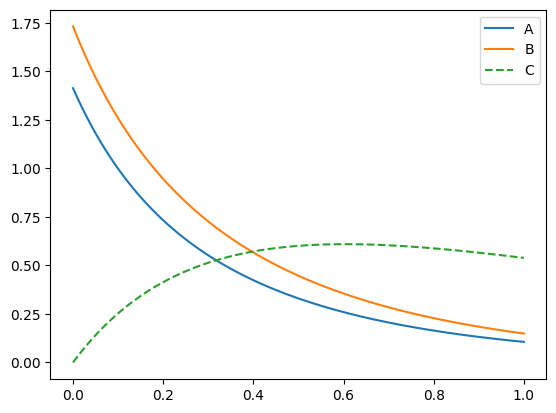

In [56]:
import bioscrape 
import numpy as np

x0 = {
    A: np.sqrt(2),
    B:np.sqrt(3), 
    C: 0
}
timepoints = np.linspace(0, 1, 100)
R = crn.simulate_with_bioscrape_via_sbml(timepoints = timepoints, initial_condition_dict = x0)

plt.plot(R['time'], R[str(A)], label = "A")
plt.plot(R['time'], R[str(B)], label = "B")
plt.plot(R['time'], R[str(C)], "--", label = "C")
plt.legend()
    

### Immediate Questions:
* In our last call we discussed x=$\sqrt{x}$ to derive x' = 2 - x $^{2}$ - can Bou elaborate more how this was derived?
* I know we had discussed using https://docs.sciml.ai/CatalBst/stable/ but this seemed like a suitable pBthon implementation for now?

### Simulation with `scipy`

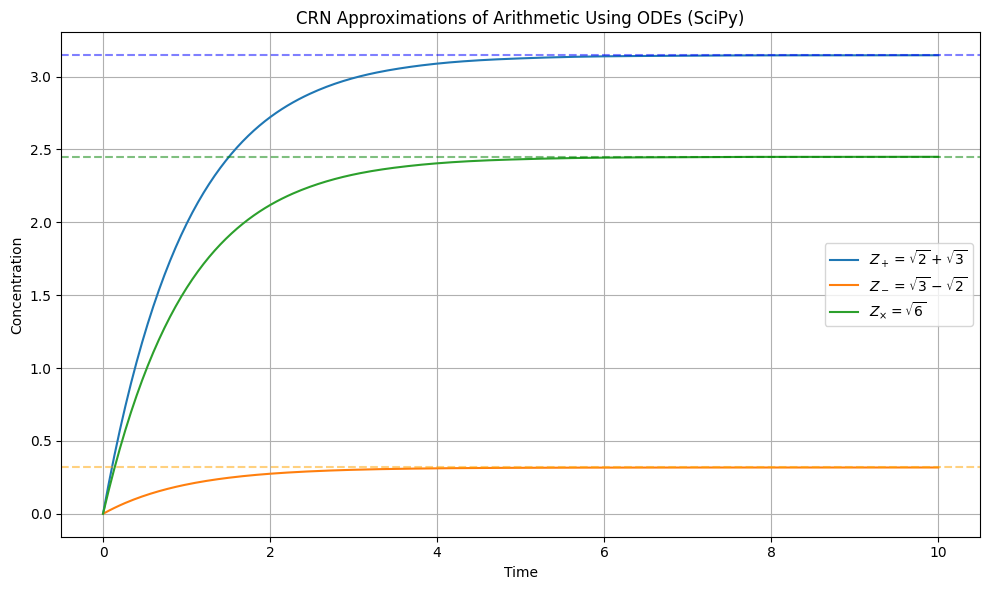

In [32]:
from scipy.integrate import solve_ivp

# Constants (fixed species concentrations)
X_val = np.sqrt(2)
Y_val = np.sqrt(3)

# Reaction rate constants
k1 = 1.0  # production
k2 = 1.0  # degradation

# ODE system: [C_addition, D_subtraction, E_multiplication]
def crn_system(t, z):
    C_addition, D_subtraction, E_multiplication = z

    dC_addition_dt = k1 * (X_val + Y_val) - k2 * C_addition
    dD_subtraction_dt = k1 * (Y_val - X_val) - k2 * D_subtraction
    dE_multiplication_dt = k1 * X_val * Y_val - k2 * E_multiplication

    return [dC_addition_dt, dD_subtraction_dt, dE_multiplication_dt]

# Initial concentrations
z0 = [0.0, 0.0, 0.0]

# Time span for simulation
t_span = (0, 10)
t_eval = np.linspace(*t_span, 300)

# Solve the system using SciPy's ODE solver
sol = solve_ivp(crn_system, t_span, z0, t_eval=t_eval)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[0], label=r'$Z_+ = \sqrt{2} + \sqrt{3}$')
plt.plot(sol.t, sol.y[1], label=r'$Z_- = \sqrt{3} - \sqrt{2}$')
plt.plot(sol.t, sol.y[2], label=r'$Z_{\times} = \sqrt{6}$')

# Draw steady state reference lines
plt.axhline(np.sqrt(2) + np.sqrt(3), color='blue', linestyle='--', alpha=0.5)
plt.axhline(np.sqrt(3) - np.sqrt(2), color='orange', linestyle='--', alpha=0.5)
plt.axhline(np.sqrt(6), color='green', linestyle='--', alpha=0.5)

plt.title("CRN Approximations of Arithmetic Using ODEs (SciPy)")
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

![title](images/crn_sqrt2_sqrt3_operations.png)